In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
data=pd.read_csv(r'/Titanic-Dataset.csv')

In [ ]:
# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-12-449c3cf55d7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-12-449c3cf55d7d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop the 'Cabin' column due to many missing values
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Encode categorical features
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

<ipython-input-36-117b92456bd5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Survived', palette=['#d62728','#2ca02c'])


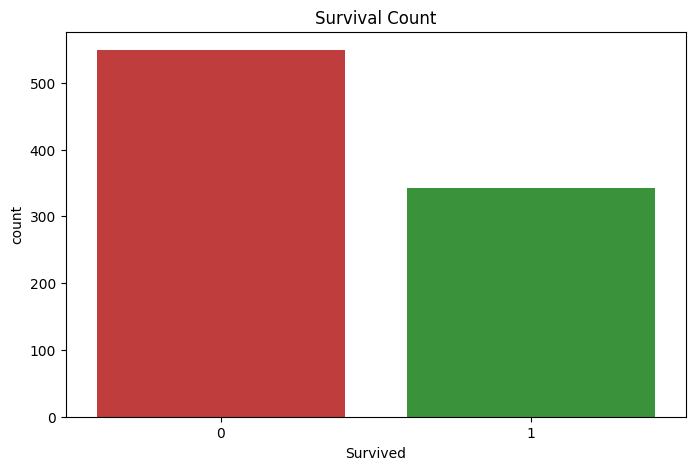

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Survived', palette=['#d62728','#2ca02c'])
plt.title("Survival Count")
plt.show()


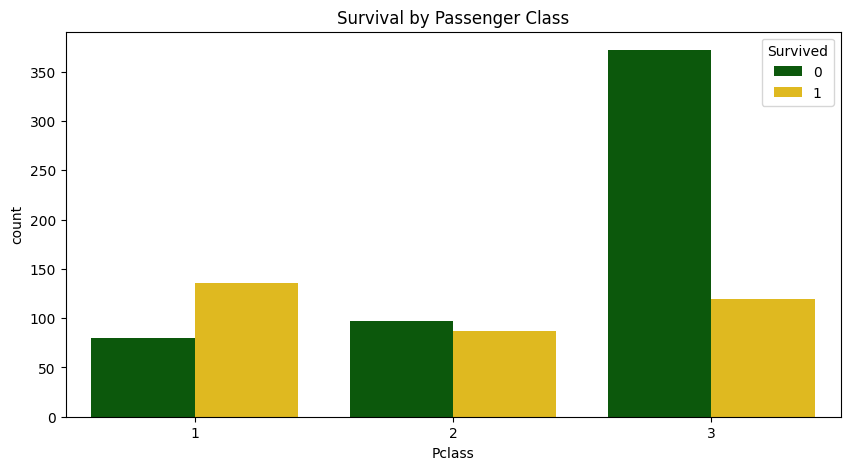

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Pclass', hue='Survived', palette=['#006400', '#FFCC00'])
plt.title("Survival by Passenger Class")
plt.show()

In [ ]:
# Feature Selection
X = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = data['Survived']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



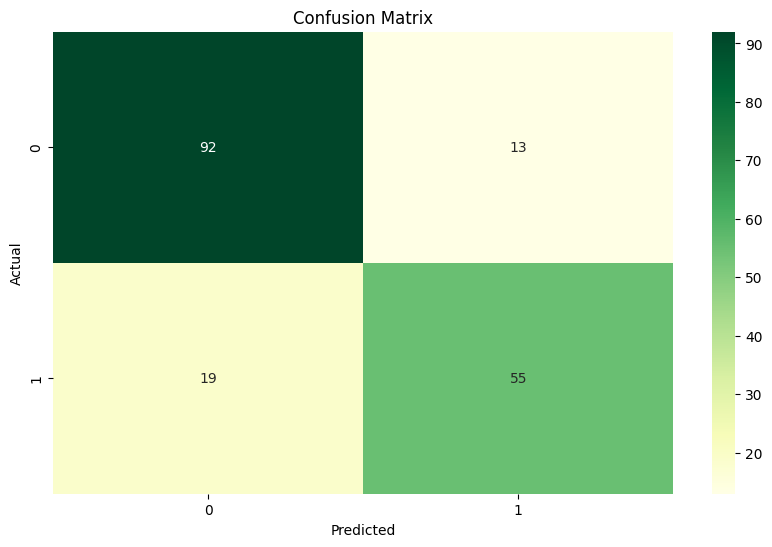

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-41-413b83ff03c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='cubehelix')


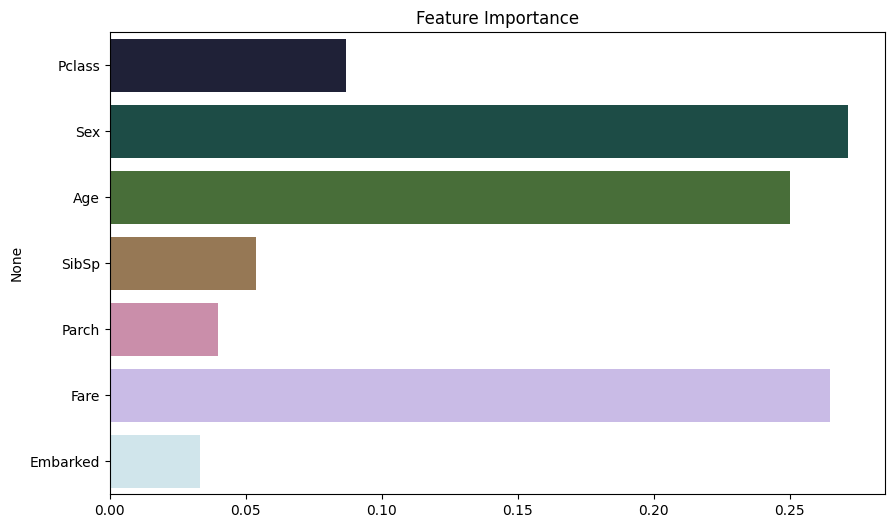

In [ ]:
# Feature Importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='cubehelix')
plt.title("Feature Importance")
plt.show()

In [ ]:
# Predict survival for the test dataset
test_predictions = model.predict(X_test)

In [ ]:
# Add predictions to the test dataset
results = X_test.copy()
results['Predicted_Survival'] = test_predictions
results['Predicted_Survival'] = results['Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})

In [ ]:
# Display a sample of the predictions
print("\nSample predictions:")
print(results.head(10))


Sample predictions:
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked Predicted_Survival
709       3    1  28.0      1      1  15.2458         0    Did Not Survive
439       2    1  31.0      0      0  10.5000         2    Did Not Survive
840       3    1  20.0      0      0   7.9250         2    Did Not Survive
720       2    0   6.0      0      1  33.0000         2           Survived
39        3    0  14.0      1      0  11.2417         0    Did Not Survive
290       1    0  26.0      0      0  78.8500         2           Survived
300       3    0  28.0      0      0   7.7500         1           Survived
333       3    1  16.0      2      0  18.0000         2    Did Not Survive
208       3    0  16.0      0      0   7.7500         1           Survived
136       1    0  19.0      0      2  26.2833         2           Survived


<ipython-input-61-8eae34743da8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Survival', data=results, palette=['#2ca02c', '#ffeb3b'])


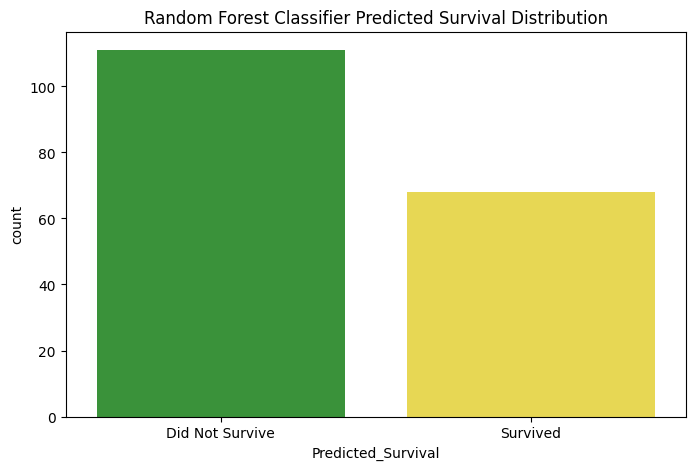

In [ ]:
# Visualize the predicted survival distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Predicted_Survival', data=results, palette=['#2ca02c', '#ffeb3b'])
plt.title("Random Forest Classifier Predicted Survival Distribution")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build a Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.81

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<ipython-input-52-0814fa139616>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Survival', data=lr_results, palette=['#2ca02c', '#ffeb3b'])


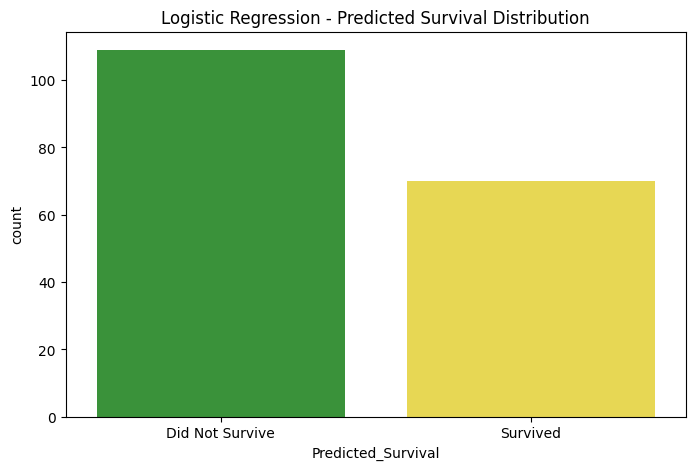

Logistic Regression Accuracy: 0.81

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
from sklearn.linear_model import LogisticRegression

# Predict survival for the test dataset
lr_predictions = model_lr.predict(X_test)

# Add predictions to the test dataset
lr_results = X_test.copy()
lr_results['Predicted_Survival'] = lr_predictions
lr_results['Predicted_Survival'] = lr_results['Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})

# Visualize the predicted survival distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Predicted_Survival', data=lr_results, palette=['#2ca02c', '#ffeb3b'])
plt.title("Logistic Regression - Predicted Survival Distribution")
plt.show()

# Evaluate the model accuracy
accuracy_lr = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


<ipython-input-58-7b723d47721c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Survival', data=knn_results, palette=['#2ca02c', '#ffeb3b'])


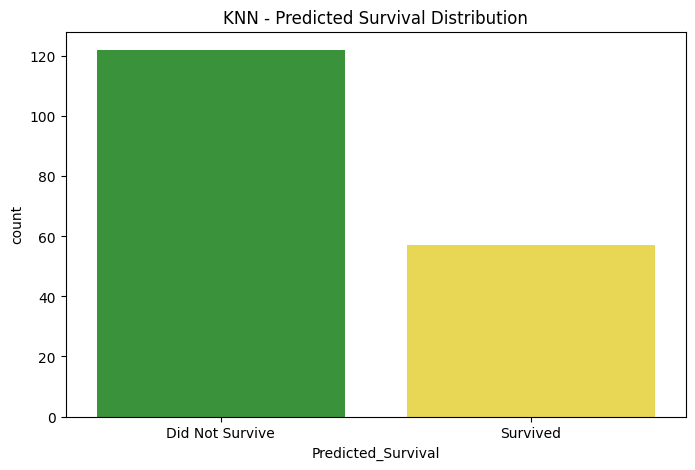

K-Nearest Neighbors Accuracy: 0.70

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



In [ ]:
# For K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
model_knn = KNeighborsClassifier()  # Create the KNN classifier object
model_knn.fit(X_train, y_train)    # Train the model using the training data

# Now you can proceed with making predictions:
knn_predictions = model_knn.predict(X_test)

# Add predictions to the test dataset
knn_results = X_test.copy()
knn_results['Predicted_Survival'] = knn_predictions
knn_results['Predicted_Survival'] = knn_results['Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})

# Visualize the predicted survival distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Predicted_Survival', data=knn_results, palette=['#2ca02c', '#ffeb3b'])
plt.title("KNN - Predicted Survival Distribution")
plt.show()

# Evaluate the model accuracy
accuracy_knn = accuracy_score(y_test, knn_predictions)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))



# ... (rest of your code)

<ipython-input-60-0ecd29aa721c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Survival', data=dt_results, palette=['#2ca02c', '#ffeb3b'])


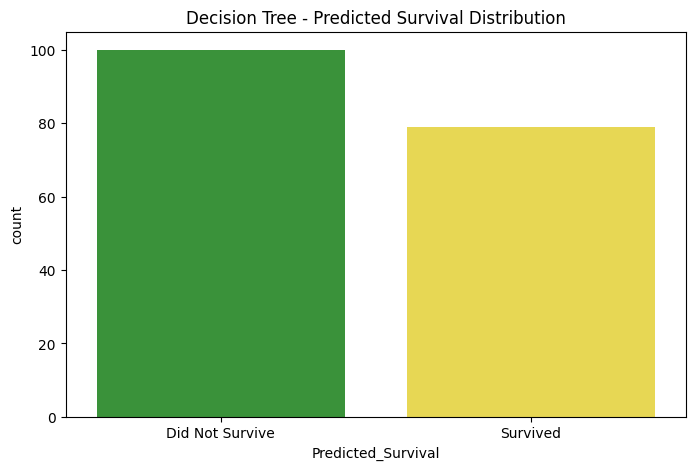

Decision Tree Accuracy: 0.78

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



In [ ]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)  # Create the classifier object
model_dt.fit(X_train, y_train)  # Train the model using the training data

# Predict survival for the test dataset
dt_predictions = model_dt.predict(X_test)

# Add predictions to the test dataset
dt_results = X_test.copy()
dt_results['Predicted_Survival'] = dt_predictions
dt_results['Predicted_Survival'] = dt_results['Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})

# Visualize the predicted survival distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Predicted_Survival', data=dt_results, palette=['#2ca02c', '#ffeb3b'])
plt.title("Decision Tree - Predicted Survival Distribution")
plt.show()

# Evaluate the model accuracy
accuracy_dt = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))


<ipython-input-66-6e3858f7661a>:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=comparison_percentages, x='Predicted_Survival', y='Percentage', hue='Model',


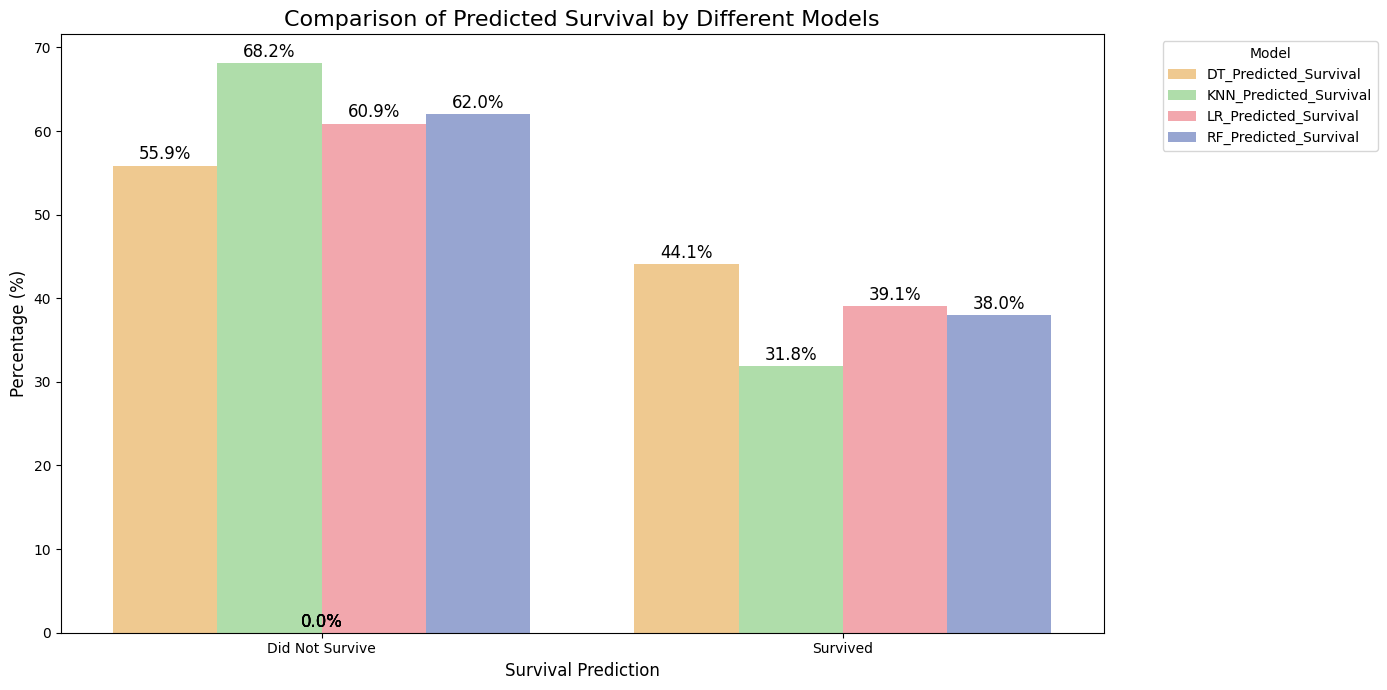

Random Forest Accuracy: 0.82
Decision Tree Accuracy: 0.78
KNN Accuracy: 0.70
Logistic Regression Accuracy: 0.81


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Predict survival for each model
rf_predictions = model.predict(X_test)
dt_predictions = model_dt.predict(X_test)
knn_predictions = model_knn.predict(X_test)
lr_predictions = model_lr.predict(X_test)

# Add predictions to the test dataset
results = X_test.copy()
results['Actual_Survival'] = y_test
results['RF_Predicted_Survival'] = rf_predictions
results['DT_Predicted_Survival'] = dt_predictions
results['KNN_Predicted_Survival'] = knn_predictions
results['LR_Predicted_Survival'] = lr_predictions

# Map predictions (0 = Did Not Survive, 1 = Survived)
results['Actual_Survival'] = results['Actual_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})
results['RF_Predicted_Survival'] = results['RF_Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})
results['DT_Predicted_Survival'] = results['DT_Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})
results['KNN_Predicted_Survival'] = results['KNN_Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})
results['LR_Predicted_Survival'] = results['LR_Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})

# Melt the data for better visualization
comparison_data = results[['Actual_Survival', 'RF_Predicted_Survival', 'DT_Predicted_Survival',
                           'KNN_Predicted_Survival', 'LR_Predicted_Survival']].melt(
    id_vars='Actual_Survival',
    value_vars=['RF_Predicted_Survival', 'DT_Predicted_Survival', 'KNN_Predicted_Survival', 'LR_Predicted_Survival'],
    var_name='Model',
    value_name='Predicted_Survival'
)

# Calculate percentages for each survival prediction
comparison_percentages = comparison_data.groupby(['Model', 'Predicted_Survival']).size().reset_index(name='Count')
total_counts = comparison_percentages.groupby('Model')['Count'].transform('sum')
comparison_percentages['Percentage'] = (comparison_percentages['Count'] / total_counts) * 100

# Plotting the comparison with differentiated models and percentage annotations
plt.figure(figsize=(14, 7))

# Define custom colors for each model
model_colors = {
    'RF_Predicted_Survival': '#8da0db',
    'DT_Predicted_Survival': '#ffcc80',
    'KNN_Predicted_Survival': '#a8e6a1',
    'LR_Predicted_Survival': '#ff9aa2'
}

# Create the bar plot
sns.barplot(data=comparison_percentages, x='Predicted_Survival', y='Percentage', hue='Model',
            palette=model_colors, ci=None)

# Display percentage values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=12, color='black',
                       xytext=(0, 8), textcoords='offset points')

# Title and labels
plt.title("Comparison of Predicted Survival by Different Models", fontsize=16)
plt.xlabel("Survival Prediction", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

# Model Evaluation - Accuracy Scores
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_predictions):.2f}")
print(f"KNN Accuracy: {accuracy_score(y_test, knn_predictions):.2f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")


In [ ]:
#Random Forest predicts with highest accuracf 82%